In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#conda install -c conda-forge scikit-plot

In [38]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

ERROR: Could not find a version that satisfies the requirement FinanceDataReader (from versions: none)
ERROR: No matching distribution found for FinanceDataReader


In [41]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
%matplotlib inline

In [5]:
# 크롤링 start_date, end_date
start_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date=input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')
pred_days=int(input('How many days do you want to predict? (Prophet에만 해당) ex) 365 : '))

YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : 2018-01-01
YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : 2021-01-07
How many days do you want to predict? (Prophet에만 해당) ex) 365 : 20


In [6]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [7]:
# 주요 3개국 대비 원 환율

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# NASDAQ
nasdaq_ = yf.download("^IXIC", start=start_date, end=end_date)
nasdaq_.columns = ['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Close','nasdaq_Adj Close','nasdaq_Volume']
nasdaq_ = nasdaq_.drop(['nasdaq_Open','nasdaq_High','nasdaq_Low','nasdaq_Adj Close','nasdaq_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd
model_samsung['macdsignal9'] = macdsignal9
model_samsung['macdhist'] = macdhist

MSCI_KR = fdr.DataReader('156080', start_date,end-date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
MSCI_KR = fdr.DataReader('156080', start_date,end-date) #MSCI KOREA
MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
MSCI_KR.columns = ['MSCI_KR']

In [43]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['RUSSELL2000'] = russell_2000_
model_samsung['NASDAQ'] = nasdaq_
model_samsung['MSCI_KR'] = MSCI_KR


In [44]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거

In [45]:
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)

KeyError: "['Open' 'High' 'Low' 'Volume'] not found in axis"

In [46]:
model_samsung

,Close,US,SNP500,RUSSELL2000,NASDAQ,MSCI_KR
날짜,,,,,,
2018-01-02,51020,1063.21,2695.810059,1550.010010,7006.899902,14430
2018-01-03,51620,1064.80,2713.060059,1552.579956,7065.529785,14580
2018-01-04,51080,1062.28,2723.989990,1555.719971,7077.910156,14445
2018-01-05,52120,1062.09,2743.149902,1560.010010,7136.560059,14657
2018-01-08,52020,1068.86,2747.709961,1561.810059,7157.390137,14791
...,...,...,...,...,...,...
2020-12-29,78300,1090.97,3727.040039,1959.359985,12850.219727,18650
2020-12-30,81000,1087.62,3732.040039,1979.989990,12870.000000,19005
2021-01-04,83000,1086.48,3700.649902,1945.910034,12698.450195,19435


In [47]:
returns = pd.DataFrame()

In [48]:
tickers = ['Close', 'US', 'SNP500', 'RUSSELL2000', 'NASDAQ','MSCI_KR']

for tick in tickers :
    returns[tick + ' Return'] = model_samsung[tick].pct_change() ## 각 항목들의 수익률을 계산한다.

returns.head()

,Close Return,US Return,SNP500 Return,RUSSELL2000 Return,NASDAQ Return,MSCI_KR Return
날짜,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.011760,0.001495,0.006399,0.001658,0.008367,0.010395
2018-01-04,-0.010461,-0.002367,0.004029,0.002022,0.001752,-0.009259
2018-01-05,0.020360,-0.000179,0.007034,0.002758,0.008286,0.014676
2018-01-08,-0.001919,0.006374,0.001662,0.001154,0.002919,0.009142


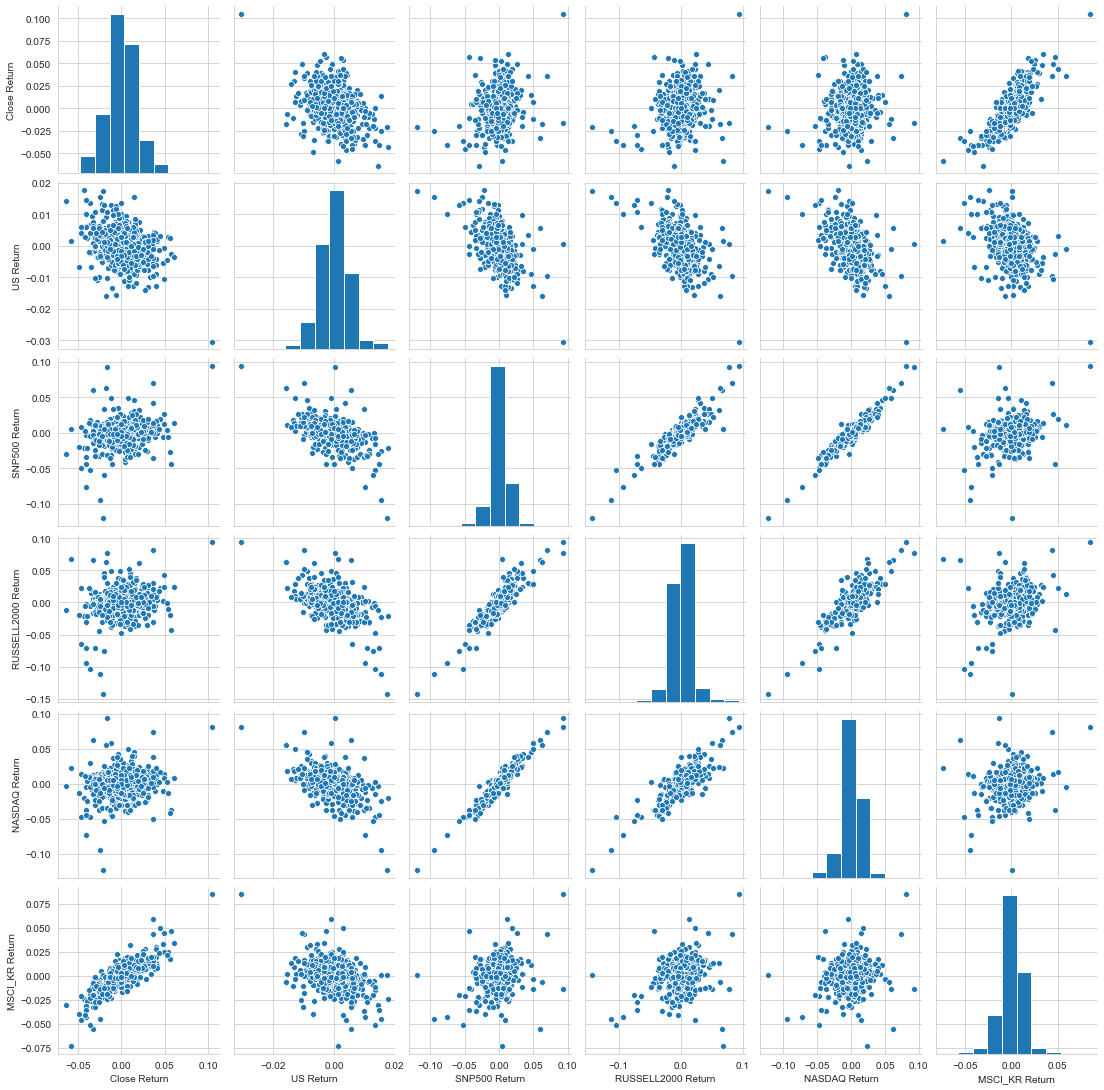

In [50]:
import seaborn as sns
sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행

In [15]:
# Worst Drop (3 of them on Inauguration day)
returns.idxmin()

Close Return         2020-03-23
US Return            2020-03-24
SNP500 Return        2020-03-16
RUSSELL2000 Return   2020-03-16
NASDAQ Return        2020-03-16
dtype: datetime64[ns]

In [16]:
# Best Single Day Gain
returns.idxmax()

Close Return         2020-03-24
US Return            2018-02-02
SNP500 Return        2020-03-24
RUSSELL2000 Return   2020-03-24
NASDAQ Return        2020-03-13
dtype: datetime64[ns]

In [17]:
returns.std()


Close Return          0.018128
US Return             0.004973
SNP500 Return         0.015087
RUSSELL2000 Return    0.018430
NASDAQ Return         0.016394
dtype: float64

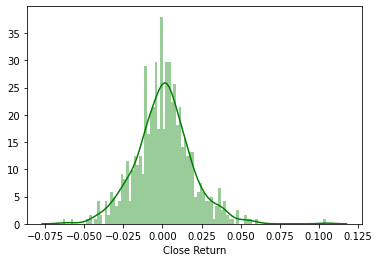

In [18]:
sns.distplot(returns.loc['2018-01-03':'2021-01-07']['Close Return'],color='green',bins=100)

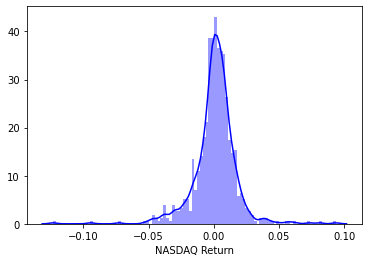

In [19]:
sns.distplot(returns.loc['2018-01-03':'2021-01-07']['NASDAQ Return'],color='blue',bins=100)

In [20]:
!pip install cufflinks

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



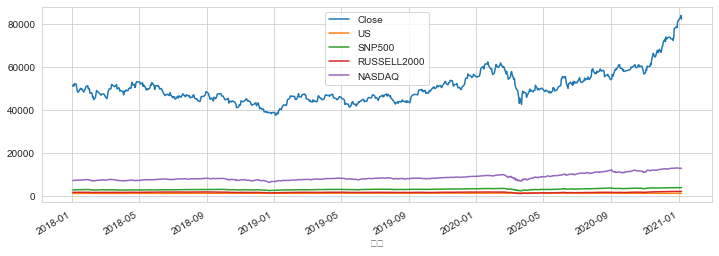

In [22]:
for tick in tickers:
    model_samsung[tick].plot(figsize=(12,4),label=tick)
plt.legend()

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



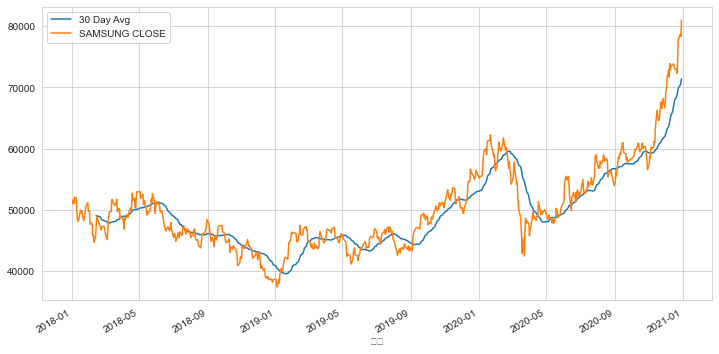

In [23]:
plt.figure(figsize=(12,6))
model_samsung['Close'].loc['2008-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
model_samsung['Close'].loc['2008-01-01':'2021-01-01'].plot(label='SAMSUNG CLOSE')
plt.legend()

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



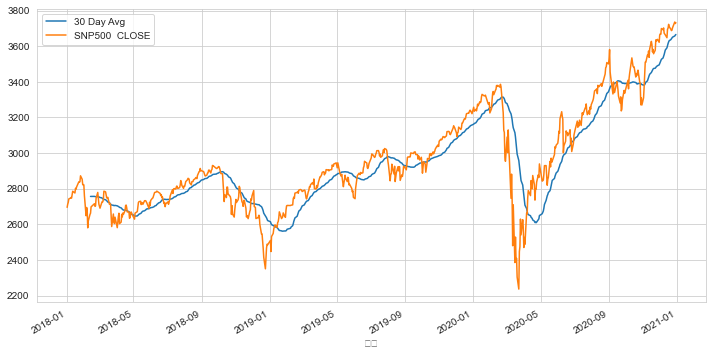

In [34]:
plt.figure(figsize=(12,6))
model_samsung['SNP500'].loc['2008-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
model_samsung['SNP500'].loc['2008-01-01':'2021-01-01'].plot(label='SNP500  CLOSE')
plt.legend()

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

C:\Users\user\anaconda3\envs\py36_32\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



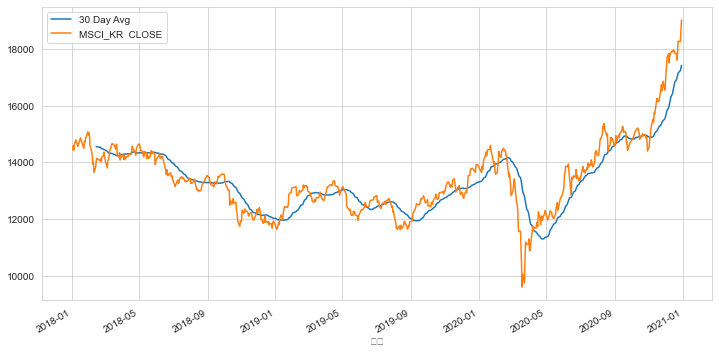

In [55]:
plt.figure(figsize=(12,6))
model_samsung['MSCI_KR'].loc['2008-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
model_samsung['MSCI_KR'].loc['2008-01-01':'2021-01-01'].plot(label='MSCI_KR  CLOSE')
plt.legend()

In [24]:
model_samsung['Close'].loc['2018-01-01':'2021-01-01'].ta_plot(study='boll')

In [25]:
model_samsung['Close'].loc['2018-01-01':'2021-01-01'].ta_plot(study='macd')